# <center> Lab 6

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
from scipy.interpolate import make_interp_spline, BSpline

### File checking

In [2]:
def check_file_path(path):
    res = True
    if not path.endswith('.csv'):
        print('ERROR: Wrong file extension (only .csv allowed)!')
        res = False
    if not os.path.exists(path):
        print('ERROR: file not found!')
        res = False
    else:
        if os.path.getsize(path) == 0:
            print('ERROR: file is empty!')
            res = False
    return res

### Input checking

In [3]:
def check_value(value):
    res = True
    if not value.isdigit():
        print('ERROR: year must be number!')
        res = False
    return res

def check_range_of_years(year_one, year_two):
    res = True
    if year_one >= year_two and year_one < 1970:
        print('ERROR: wrong range of years!')
        res = False
    return res

### Data for task

In [4]:
initial_age_path = 'data/InitialAge.csv'
death_rules_path = 'data/DeathRules.csv'
population_by_year_path = 'data/population.csv'
result_file_path = 'data/result.csv'
c_sharp_exe_file = 'Demographic/Demographic.Exec/Demographic.Exec.csproj'
start_year = input('Enter simulation start year: ')
end_year = input('Enter simulation end year: ')
initial_population = input('Enter population (in thousands): ')
commands = [
    "dotnet",
    "run",
    "--project",
    c_sharp_exe_file,
    initial_age_path,
    death_rules_path,
    start_year,
    end_year,
    initial_population,
    population_by_year_path,
    result_file_path
]
is_files_correct = check_file_path(initial_age_path) and check_file_path(death_rules_path)
is_values_correct = check_value(start_year) and check_value(end_year) and check_value(initial_population)
is_years_range_correct = check_range_of_years(start_year, end_year)

Enter simulation start year: 1970
Enter simulation end year: 2021
Enter population (in thousands): 25


## Modeling process

In [5]:
if not is_files_correct or not is_values_correct or not is_years_range_correct:
    print("It's impossible to simulate process!")
else:
    subprocess.run(commands)

### Reading result data

In [6]:
if not is_files_correct or not is_values_correct or not is_years_range_correct:
    print("It's impossible to read data!")
else:
    population_df = pd.read_csv(population_by_year_path)
    result_by_gender_df = pd.read_csv(result_file_path)
    
    
    male_on_end_df = result_by_gender_df[result_by_gender_df['Gender'] == 'Male']
    female_on_end_df = result_by_gender_df[result_by_gender_df['Gender'] == 'Female']

# Spline chart of total population change by year

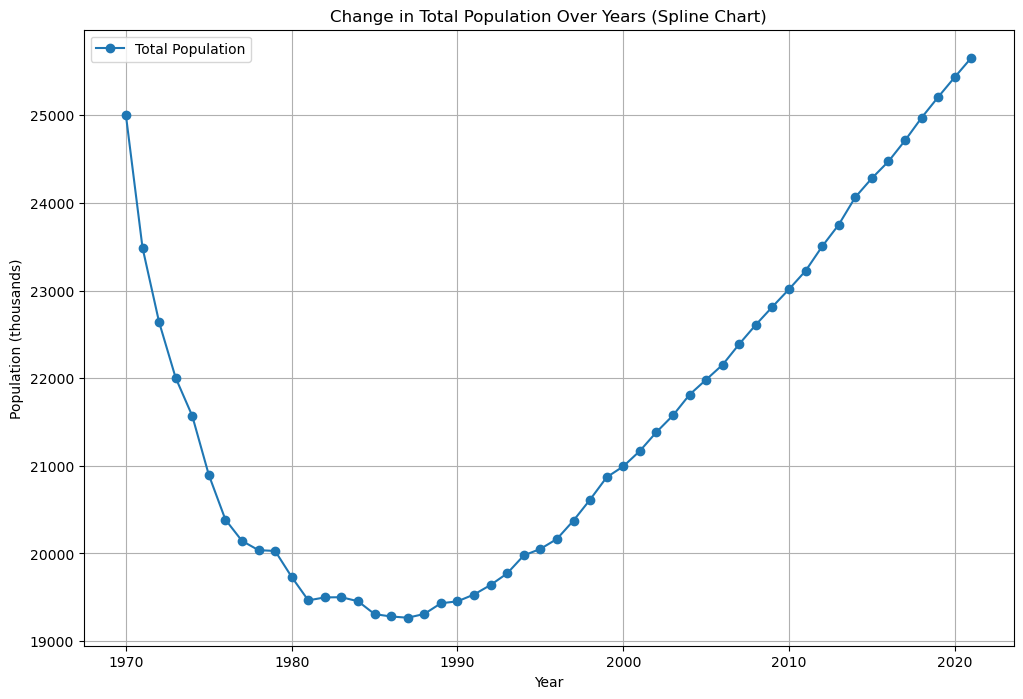

In [7]:
if not is_files_correct or not is_values_correct or not is_years_range_correct:
    print("Plot can't be made!")
else:
    plt.figure(figsize=(12, 8))
    x_new = np.linspace(population_df['Year'].min(), population_df['Year'].max(), population_df['Year'].count())
    spl = make_interp_spline(population_df['Year'], population_df['Male'] + population_df['Female'], k=3)
    y_new = spl(x_new)
    plt.plot(x_new, y_new, label='Total Population', marker='o')
    plt.title('Change in Total Population Over Years (Spline Chart)')
    plt.xlabel('Year')
    plt.ylabel('Population (thousands)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Spline chart of male population change by year

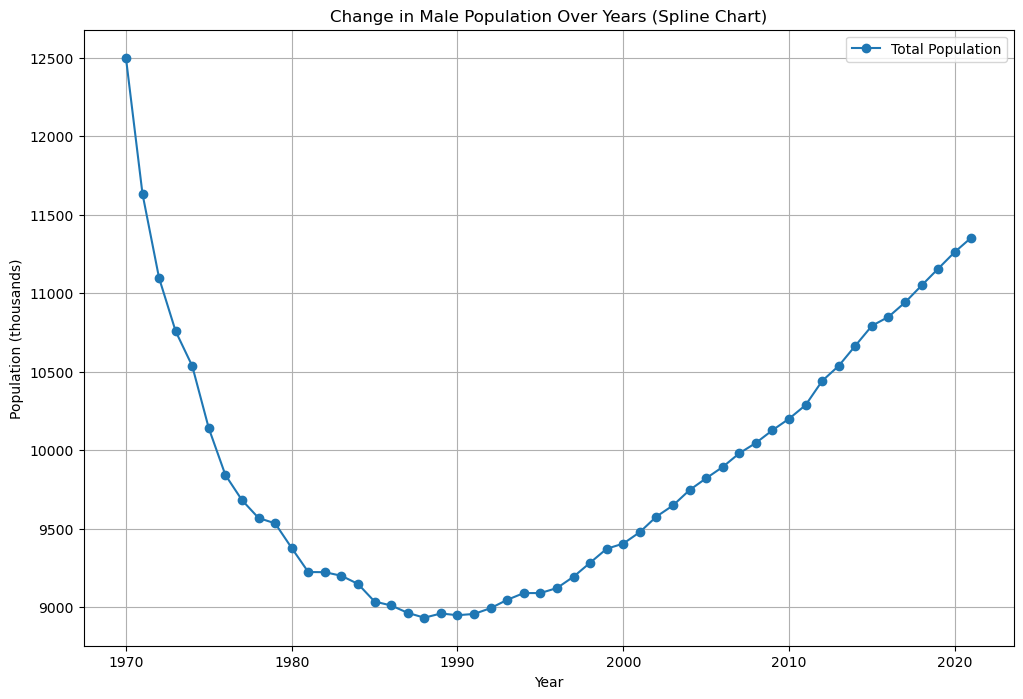

In [8]:
if not is_files_correct or not is_values_correct or not is_years_range_correct:
    print("Plot can't be made!")
else:
    plt.figure(figsize=(12, 8))
    x_new = np.linspace(population_df['Year'].min(), population_df['Year'].max(), population_df['Year'].count())
    spl = make_interp_spline(population_df['Year'], population_df['Male'], k=3)
    y_new = spl(x_new)
    plt.plot(x_new, y_new, label='Total Population', marker='o')
    plt.title('Change in Male Population Over Years (Spline Chart)')
    plt.xlabel('Year')
    plt.ylabel('Population (thousands)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Spline chart of female population change by year

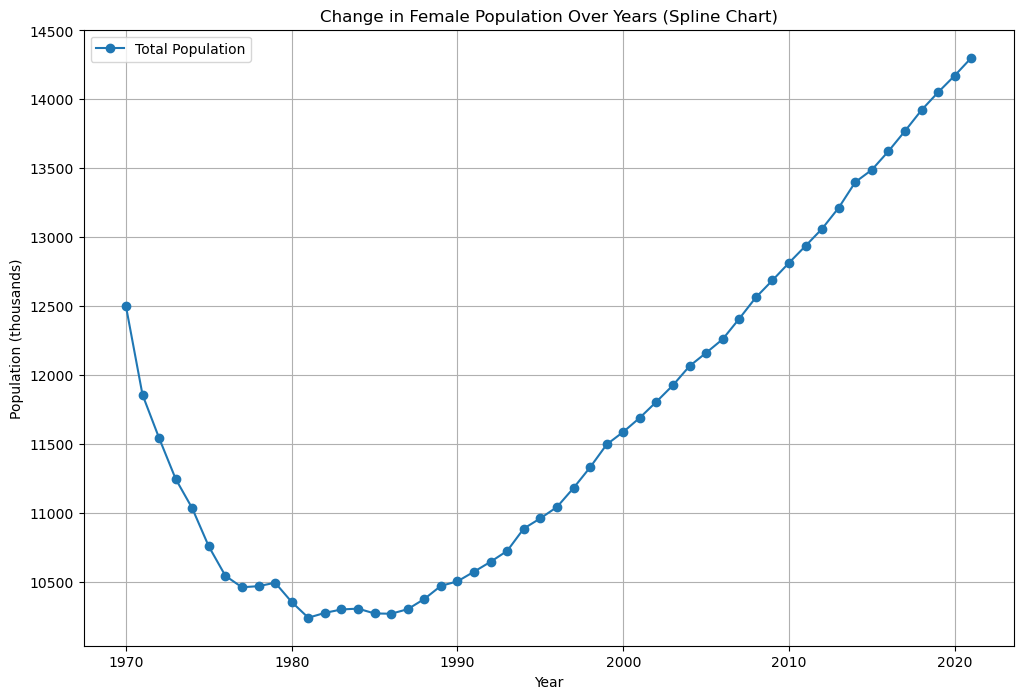

In [9]:
if not is_files_correct or not is_values_correct or not is_years_range_correct:
    print("Plot can't be made!")
else:
    plt.figure(figsize=(12, 8))
    x_new = np.linspace(population_df['Year'].min(), population_df['Year'].max(), population_df['Year'].count())
    spl = make_interp_spline(population_df['Year'], population_df['Female'], k=3)
    y_new = spl(x_new)
    plt.plot(x_new, y_new, label='Total Population', marker='o')
    plt.title('Change in Female Population Over Years (Spline Chart)')
    plt.xlabel('Year')
    plt.ylabel('Population (thousands)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Bar chart of age composition of male population at the end of modeling for the age categories 0-18, 19-45, 45-65 and 65-100 years

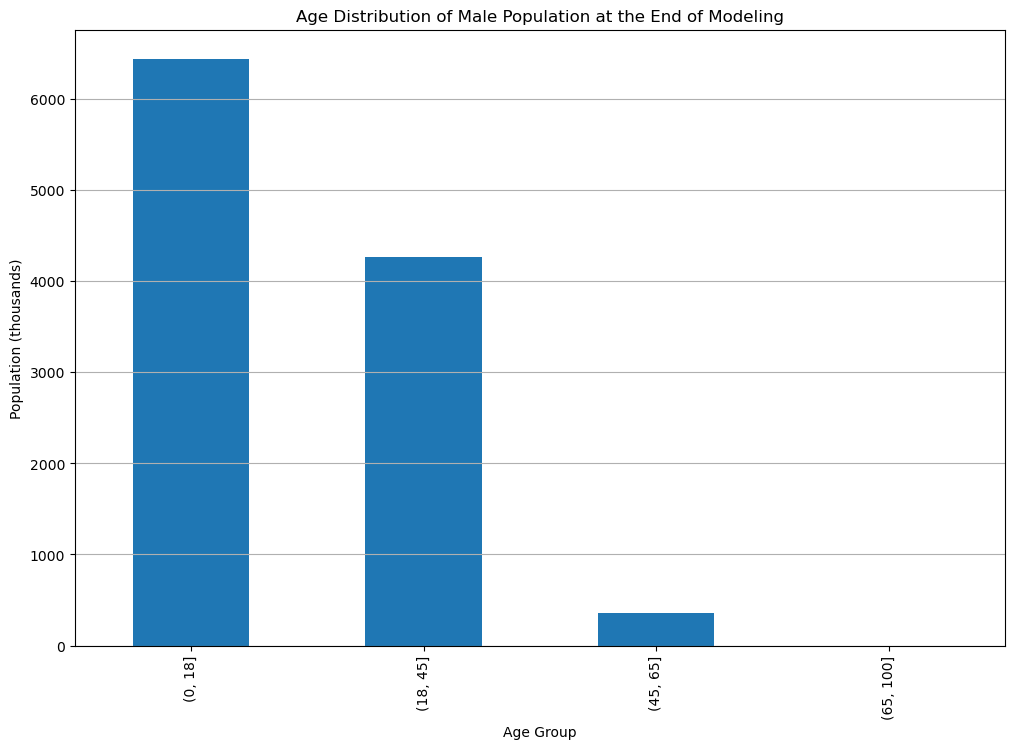

In [10]:
if not is_files_correct or not is_values_correct or not is_years_range_correct:
    print("Plot can't be made!")
else:
    male_age_counts = male_on_end_df.groupby(pd.cut(male_on_end_df['Age'], bins=[0, 18, 45, 65, 100])).size()
    female_age_counts = female_on_end_df.groupby(pd.cut(female_on_end_df['Age'], bins=[0, 18, 44, 65, 100])).size()
    plt.figure(figsize=(12, 8))
    male_age_counts.plot(kind='bar')
    plt.title('Age Distribution of Male Population at the End of Modeling')
    plt.xlabel('Age Group')
    plt.ylabel('Population (thousands)')
    plt.grid(True, axis='y')
    plt.show()

# Bar chart of age composition of female population at the end of modeling for the age categories 0-18, 19-45, 45-65 and 65-100 years

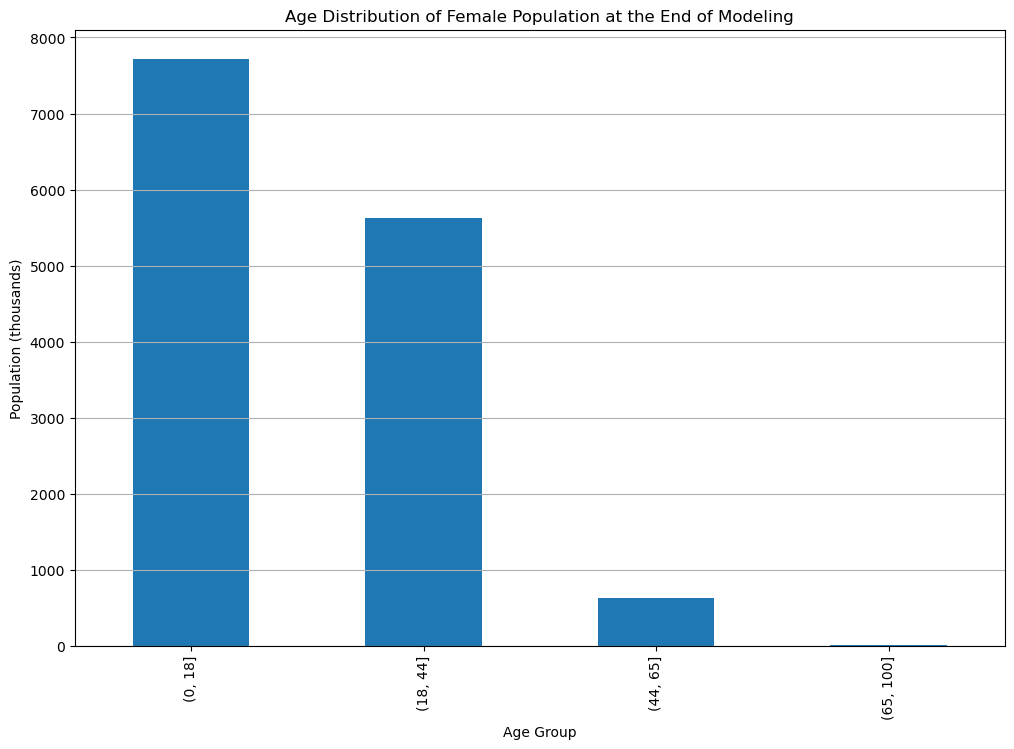

In [11]:
if not is_files_correct or not is_values_correct or not is_years_range_correct:
    print("Plot can't be made!")
else:
    plt.figure(figsize=(12, 8))
    female_age_counts.plot(kind='bar')
    plt.title('Age Distribution of Female Population at the End of Modeling')
    plt.xlabel('Age Group')
    plt.ylabel('Population (thousands)')
    plt.grid(True, axis='y')
    plt.show()